my notes from [Pandas Tutorial](https://www.youtube.com/watch?v=2uvysYbKdjM&t=12s)

## Libraries

In [2]:
import pandas as pd
import numpy as np

## DataFrames

In [42]:
print(pd.__file__) # path where the pandas library is installed
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], columns=["A", "B", "C"], index=["x","y","z",'zz'])
print(df)

d:\Новая папка\OneDrive\Рабочий стол\learning-visualisation-of_data\venv\Lib\site-packages\pandas\__init__.py
     A   B   C
x    1   2   3
y    4   5   6
z    7   8   9
zz  10  11  12


**info()** -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [44]:
df.head() # 5 lines par default
df.head(3) 
df.tail(2) 

,A,B,C
z,7,8,9
zz,10,11,12


In [ ]:
print("df.index.tolist():")
print(df.index.tolist())

print("\ndf.columns:")
print(df.columns)

print("\ndf.info():")
df.info()

df.index.tolist():
['x', 'y', 'z', 'zz']

df.columns:
Index(['A', 'B', 'C'], dtype='object')

df.info():
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, x to zz
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


In [46]:
df.describe()
#std - standard deviation

,A,B,C
count,4.000000,4.000000,4.000000
mean,5.500000,6.500000,7.500000
std,3.872983,3.872983,3.872983
min,1.000000,2.000000,3.000000
25%,3.250000,4.250000,5.250000
50%,5.500000,6.500000,7.500000
75%,7.750000,8.750000,9.750000
max,10.000000,11.000000,12.000000


In [47]:
df.nunique()
df['A'].unique()

array([ 1,  4,  7, 10])

In [48]:
df.size # n * m

12

In [49]:
df.shape

(4, 3)

### summary dataframes

In [ ]:
matrix = np.array([[1, 2, 3],[np.nan, 5, np.nan],[7, 8, 9]])
colums = ['A', 'B', 'C']
index = ['x', 'y', 'z']
my_df = pd.DataFrame(matrix, columns=colums, index=index)
print(my_df)
# my_df.A
# my_df.loc['z']
# my_df.iloc[1]  
# my_df['z'] # key error
# my_df['B']
# print(my_df.info())
# print(df.index.tolist())
# print(my_df.columns)
# print(my_df.describe())
# print(my_df.shape)
# print(my_df.size)
print(my_df['A'].unique())
print(my_df.nunique())
# print(my_df['A'].unique())

     A    B    C
x  1.0  2.0  3.0
y  NaN  5.0  NaN
z  7.0  8.0  9.0
[ 1. nan  7.]
A    2
B    3
C    2
dtype: int64


## Loading in Dataframes from Files

In [50]:
#results = pd.read_csv('./data/result.csv')
coffee = pd.read_csv('./data/coffee.csv')
bios = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/bios.csv')
results_parquet = pd.read_parquet('./data/results.parquet') # need to be installed pip install pyarrow
regions = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv")
coffee
coffee.sample(10, random_state=1)

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
7,Thursday,Latte,30
6,Thursday,Espresso,40
2,Tuesday,Espresso,30
10,Saturday,Espresso,45
4,Wednesday,Espresso,35
1,Monday,Latte,15
12,Sunday,Espresso,45
0,Monday,Espresso,25
13,Sunday,Latte,35


In [ ]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx', sheet_name="results")
#need to install 'pip install openpyxl'
olympics_data.head()

In [ ]:
import os
print(os.getcwd())       
print(os.listdir('./'))   
print(os.listdir('./data'))  

Accessing Data with Pandas

In [ ]:
# loc
# coffee.loc[Rows, Columns]

print()
print(coffee.loc[0])
print()
print(coffee.loc[[0,1,5]])
print()
print(coffee.loc[5:9, ["Day", "Units Sold"]])
print()
print(coffee.iloc[:, [0,2]])

loc - the name of a row or column, but not the position
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc

iloc - by row or column number (as in Python lists)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc

Other Stuff

In [ ]:
print()
coffee.index = coffee["Day"] #to change index
print() 
coffee = pd.read_csv('./warmup-data/coffee.csv')

In [ ]:
coffee.loc[1:3, "Units Sold"] = 10 # to set value

# to access only one element
coffee.at[0,"Units Sold"] 
coffee.iat[3,1]

In [ ]:
# to access collums
coffee.Day #if its a single word
coffee["Day"]

In [ ]:
#Sort Values

print()
coffee.sort_values(["Units Sold"])
print()
coffee.sort_values(["Units Sold"], ascending=False)
print()
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=[0,1])
# 0 → descending
# 1 → ascending

##### Iterate over dataframe with for loop

In [ ]:
for index, row in coffee.iterrows():
    print(index)
    print(row)
    print("Coffee Type of Row:", row["Coffee Type"])

#### Filtering Data

In [ ]:
bios.head()

In [ ]:
bios.loc[bios["height_cm"] > 215]
bios.loc[bios["height_cm"] > 215, ["name", "height_cm"]]
bios[bios['height_cm'] > 215][["name","height_cm"]] # Short-hand syntax (without .loc)
bios[(bios['height_cm'] > 215) & (bios['born_country']=='USA')] # Multiple filter conditions
bios[bios['name'].str.contains("keith", case=False)] # Filter by string conditions

### Filter by string conditions

In [ ]:
bios[bios['name'].str.contains("keith", case=False)] # Filter by string conditions
bios[bios['name'].str.contains('keith|patrick', case=False)]

In [ ]:
# Other cool regex filters

# Find athletes born in cities that start with a vowel:
vowel_cities = bios[bios['born_city'].str.contains(r'^[AEIOUaeiou]', na=False)]

# Find athletes with names that contain exactly two vowels:
two_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*$', na=False)]

# Find athletes with names that have repeated consecutive letters (e.g., "Aaron", "Emmett"):
repeated_letters = bios[bios['name'].str.contains(r'(.)\1', na=False)]

# Find athletes with names ending in 'son' or 'sen':
son_sen_names = bios[bios['name'].str.contains(r'son$|sen$', case=False, na=False)]

# Find athletes born in a year starting with '19':
born_19xx = bios[bios['born_date'].str.contains(r'^19', na=False)]

# Find athletes with names that do not contain any vowels:
no_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*$', na=False)]

# Find athletes whose names contain a hyphen or an apostrophe:
hyphen_apostrophe = bios[bios['name'].str.contains(r"[-']", na=False)]

# Find athletes with names that start and end with the same letter:
start_end_same = bios[bios['name'].str.contains(r'^(.).*\1$', na=False, case=False)]

# Find athletes with a born_city that has exactly 7 characters:
city_seven_chars = bios[bios['born_city'].str.contains(r'^.{7}$', na=False)]

# Find athletes with names containing three or more vowels:
three_or_more_vowels = bios[bios['name'].str.contains(r'([AEIOUaeiou].*){3,}', na=False)]

### Query functions

In [ ]:
bios.query('born_country == "USA" and born_city == "Seattle"')

## Adding / Removing Columns

In [ ]:
coffee['price'] = 4.99
coffee.head()

In [ ]:
coffee['new_price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99) 
# if the column does not yet exist, it is created

In [ ]:
coffee

In [ ]:
coffee.drop(columns=['price'], inplace=True) # to delete a column or row
# inplace=True -> to change DataFrame
# inplace=False, by default -> to make a new copy of the DataFrame

# the below would also have worked
# coffee = coffee.drop(columns=['price'])

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop

In [ ]:
coffee = coffee[['Day', 'Coffee Type', 'Units Sold', 'new_price']]
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']
coffee

In [ ]:
new_coffee = coffee # a link
new_coffee = coffee.copy() # a copy
new_coffee['price'] = 4.99

In [ ]:
coffee

In [ ]:
new_coffee

In [ ]:
coffee.rename(columns={'new_price': 'price'}, inplace=True)

In [ ]:
bios_new = bios.copy()
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]
bios_new.query('first_name == "Keith"')

In [ ]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'])
bios_new['born_year'] = bios_new['born_datetime'].dt.year
bios_new[['name','born_year']]

In [ ]:
bios_new.to_csv('./data/bios_new.csv', index=False) # index=False -> do not save the index to a file 
bios['height_category'] = bios['height_cm'].apply(lambda x: 'Short' if x < 165 else ('Average' if x < 185 else 'Tall'))

def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
    
bios['Category'] = bios.apply(categorize_athlete, axis=1)
# axis=1 -> rows
# axis=0 -> colums

bios.head()

## Merging & Concatenating Data

In [ ]:
nocs = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv')

bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

usa = bios[bios['born_country']=='USA'].copy()
gbr = bios[bios['born_country']=='GBR'].copy()

new_df = pd.concat([usa,gbr])

new_df.tail()

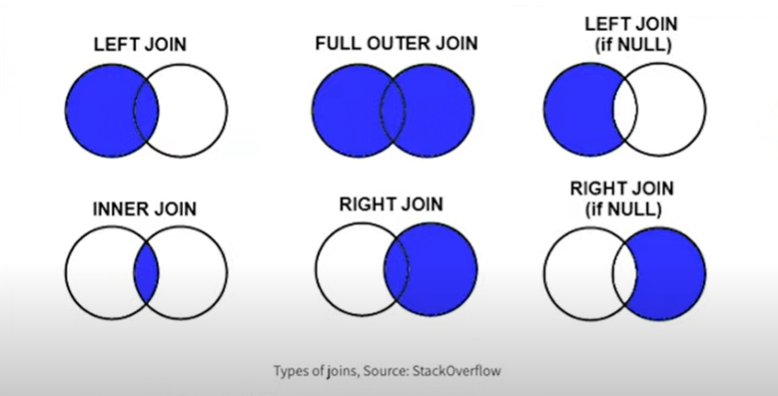

In [ ]:
# combined_df = pd.merge(results, bios, on='athlete_id', how='left')
# combined_df.head()

### Handling Null Values

In [ ]:
coffee.loc[[2,3], 'Units Sold'] = np.nan
coffee['Units Sold'].fillna(coffee['Units Sold'].mean(), inplace=True) # mean of the whole collum
# coffee['Units Sold'] = coffee['Units Sold'].interpolate()
coffee['Units Sold'].interpolate()
coffee.dropna(subset=['Units Sold']) # Use inplace=True if you want to update the coffee df
coffee[coffee['Units Sold'].notna()]
coffee

In [ ]:
coffee.loc[[2,3], 'Units Sold'] = np.nan
coffee['Units Sold'].fillna(coffee['Units Sold'].mean()) 

In [ ]:
coffee

### Aggregating Data

In [ ]:
bios.head()
bios['born_city'].value_counts()

In [ ]:
bios[bios['born_country']=='USA']['born_region'].value_counts().head(10)

In [ ]:
bios[bios['born_country']=='USA']['born_region'].value_counts().tail(25)

#### Groupby function in Pandas

In [ ]:
coffee.groupby(['Coffee Type'])['Units Sold'].sum()

In [ ]:
coffee.groupby(['Coffee Type'])['Units Sold'].mean()

In [ ]:
coffee.groupby(['Coffee Type', 'Day']).agg({'Units Sold': 'sum'})

#### Pivot Tables

In [ ]:
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='revenue')

In [ ]:
pivot.sum()
pivot.sum(axis=1)

#### Using datetime with Groupby